In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr

In [15]:
data_path = 'weather.csv' 
data = pd.read_csv(data_path)

In [16]:
def hitung_histogram_manual(data, bins=10):
    hist_data = {}
    for kolom in data.select_dtypes(include=['number']).columns:
        kolom_data = data[kolom].dropna().tolist()
        min_val = min(kolom_data)
        max_val = max(kolom_data)
        bin_width = (max_val - min_val) / bins
        bin_edges = [min_val + i * bin_width for i in range(bins + 1)]
        bin_counts = [0] * bins

        for value in kolom_data:
            for i in range(bins):
                if bin_edges[i] <= value < bin_edges[i + 1]:
                    bin_counts[i] += 1
                    break
                elif value == bin_edges[-1]:  # Include the rightmost edge
                    bin_counts[-1] += 1

        hist_data[kolom] = (bin_edges, bin_counts)
    return hist_data

In [17]:
def hitung_boxplot_manual(data):
    boxplot_data = {}
    for kolom in data.select_dtypes(include=['number']).columns:
        kolom_data = sorted(data[kolom].dropna().tolist())
        n = len(kolom_data)
        median = (kolom_data[n // 2] if n % 2 != 0 else (kolom_data[n // 2 - 1] + kolom_data[n // 2]) / 2)
        q1 = kolom_data[n // 4]
        q3 = kolom_data[(3 * n) // 4]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = [x for x in kolom_data if x < lower_bound or x > upper_bound]
        
        boxplot_data[kolom] = {
            'median': median,
            'q1': q1,
            'q3': q3,
            'iqr': iqr,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outliers': outliers
        }
    return boxplot_data

In [18]:
def hitung_histogram_string_manual(data):
    hist_data = {}
    for kolom in data.select_dtypes(include=['object']).columns:
        value_counts = data[kolom].value_counts()
        hist_data[kolom] = (value_counts.index.tolist(), value_counts.tolist())
    return hist_data

In [19]:
def visualisasi_histogram_manual(hist_data):
    for kolom, (bin_edges, bin_counts) in hist_data.items():
        plt.figure(figsize=(10, 5))
        plt.bar(bin_edges[:-1], bin_counts, width=np.diff(bin_edges), edgecolor='black', align='edge')
        plt.title(f'Histogram {kolom}')
        plt.xlabel(kolom)
        plt.ylabel('Frekuensi')
        plt.show()

In [20]:
def visualisasi_boxplot_manual(boxplot_data):
    for kolom, stats in boxplot_data.items():
        plt.figure(figsize=(10, 5))
        plt.boxplot(data[kolom].dropna(), vert=False)
        plt.title(f'Box Plot {kolom}')
        plt.xlabel(kolom)
        plt.show()

In [21]:
def visualisasi_histogram_string_manual(hist_data):
    for kolom, (categories, counts) in hist_data.items():
        plt.figure(figsize=(10, 5))
        plt.bar(categories, counts, edgecolor='black')
        plt.title(f'Histogram {kolom}')
        plt.xlabel(kolom)
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.show()

Visualisasi Histogram dan Box Plot Manual:


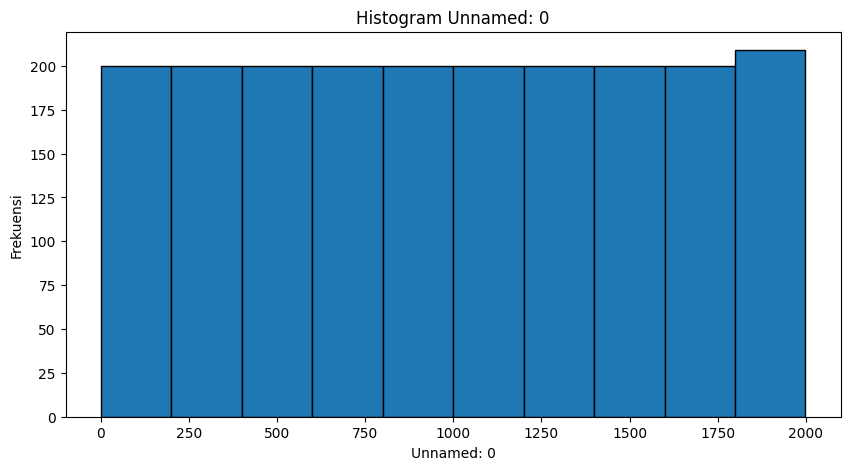

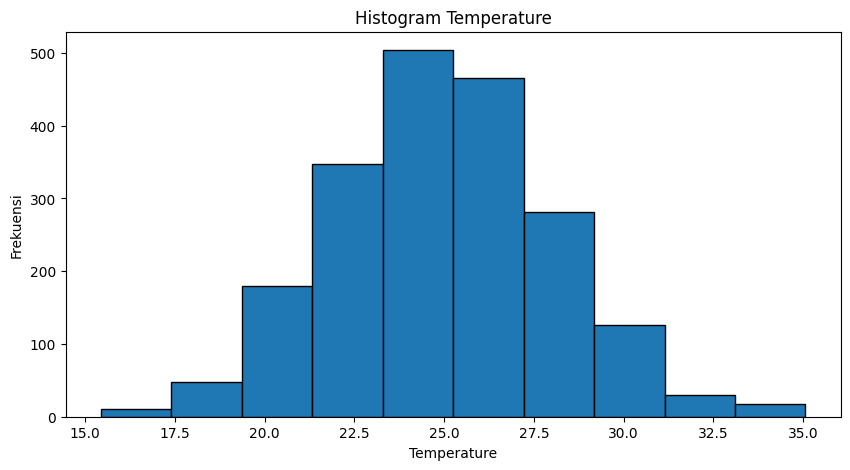

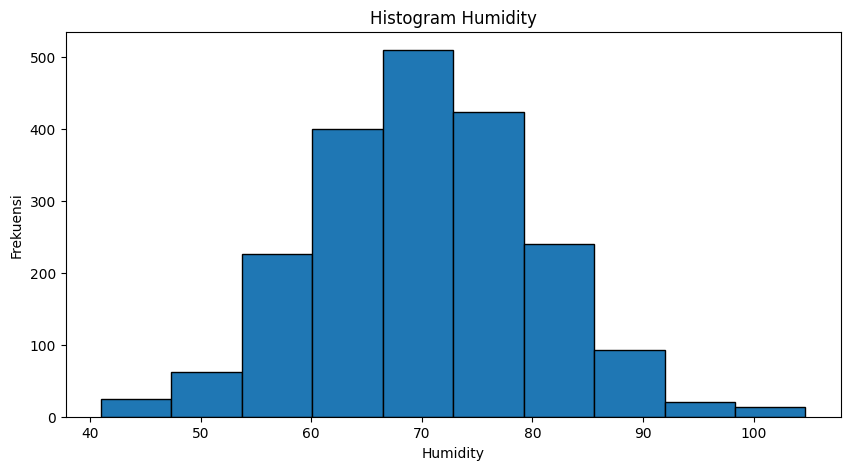

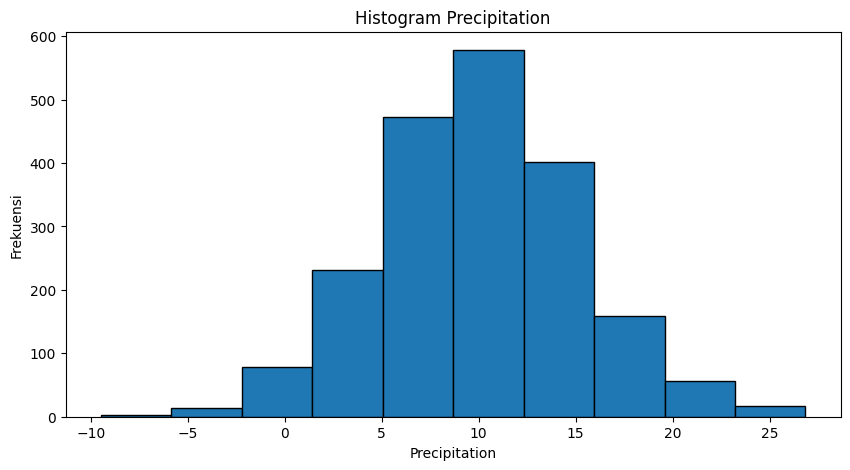

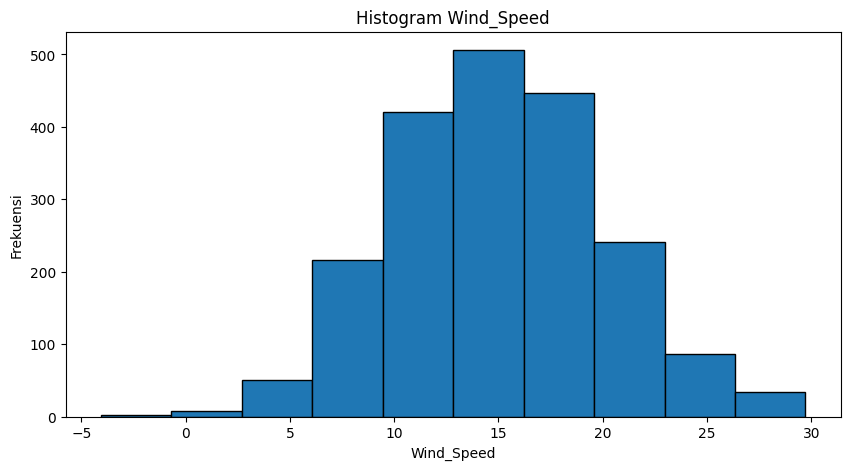

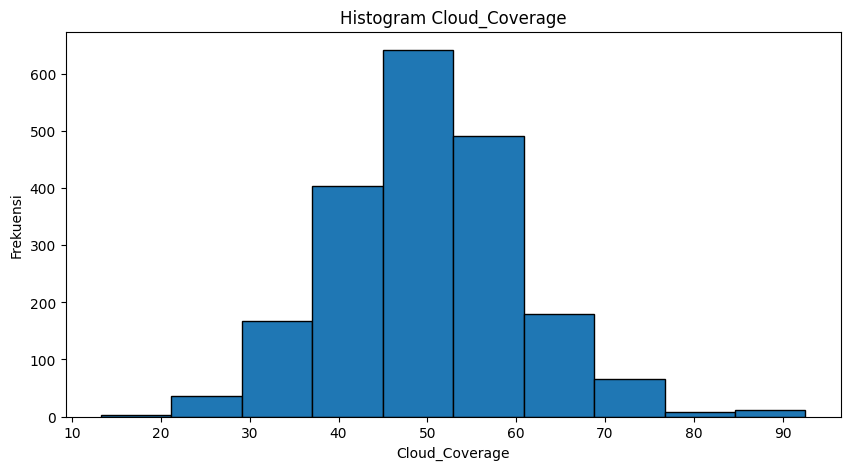

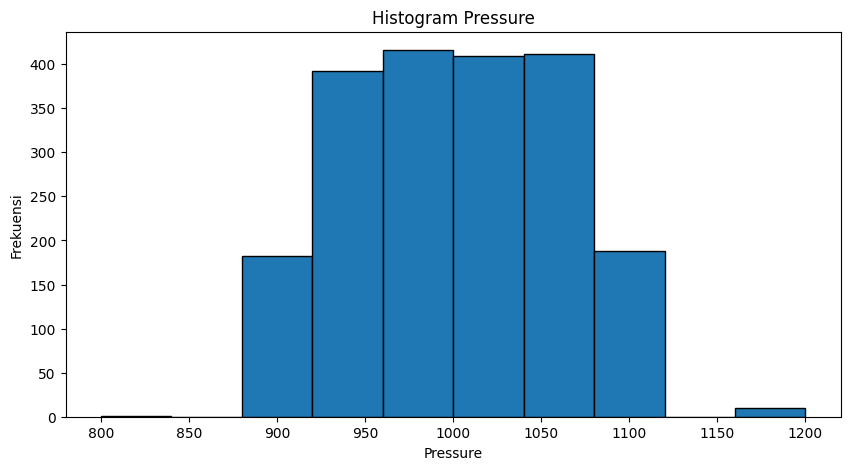

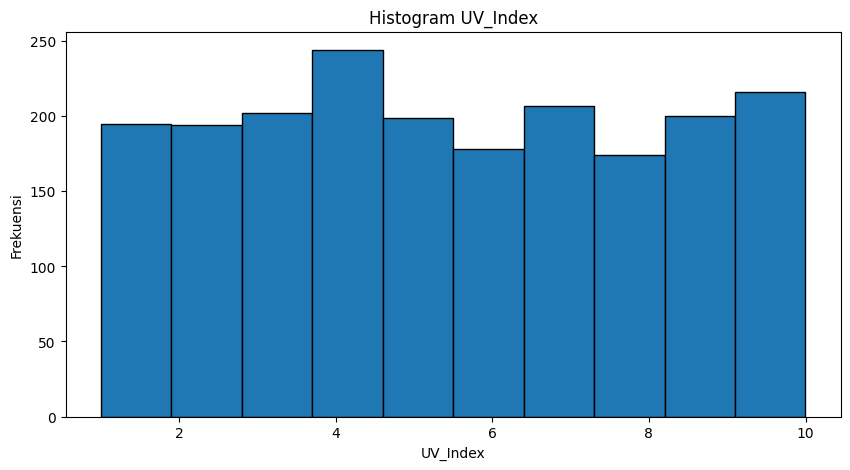

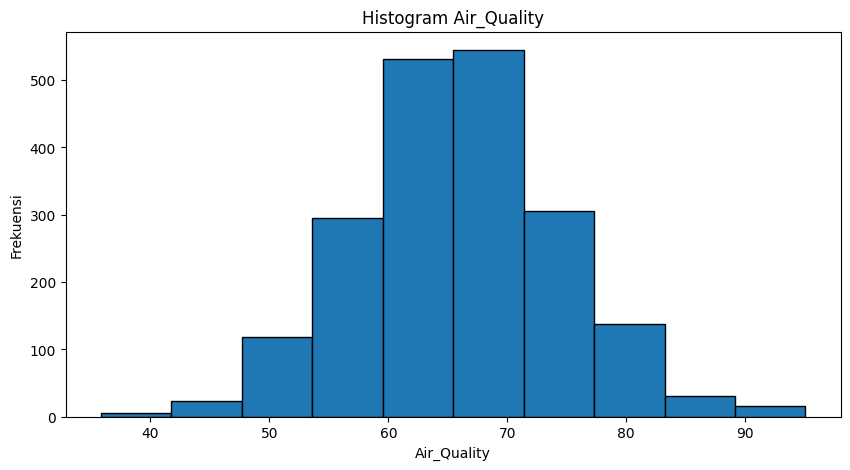

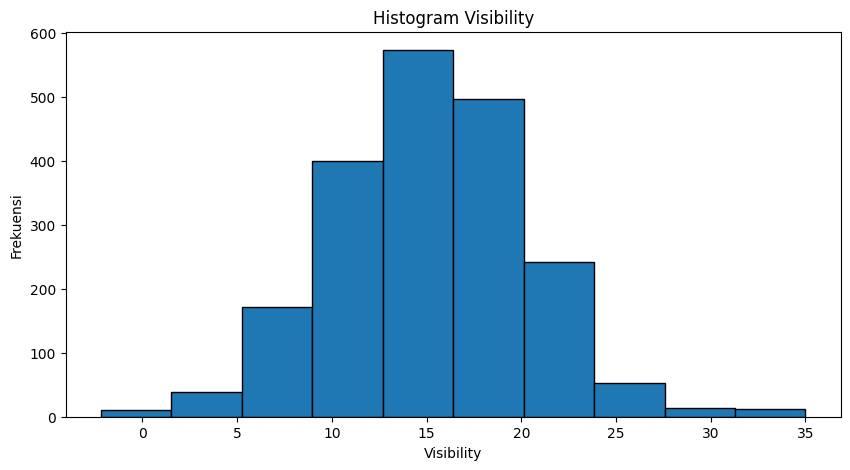

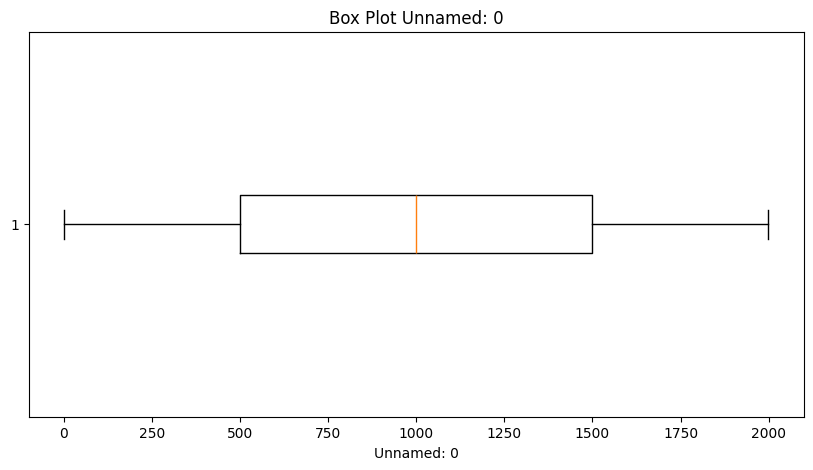

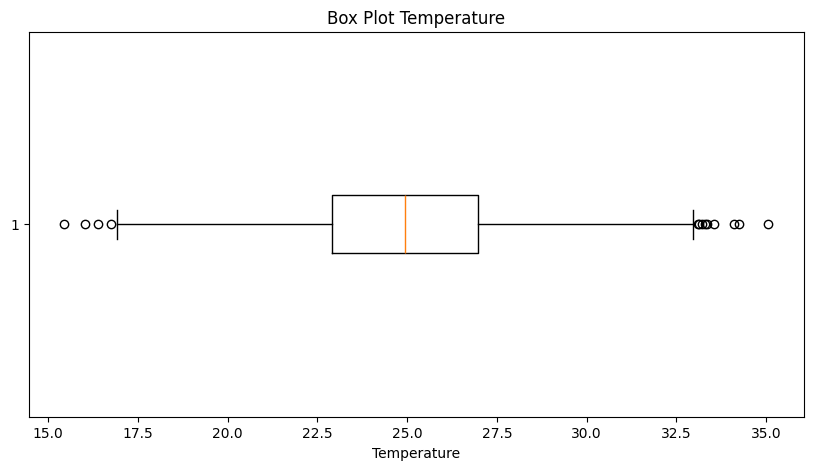

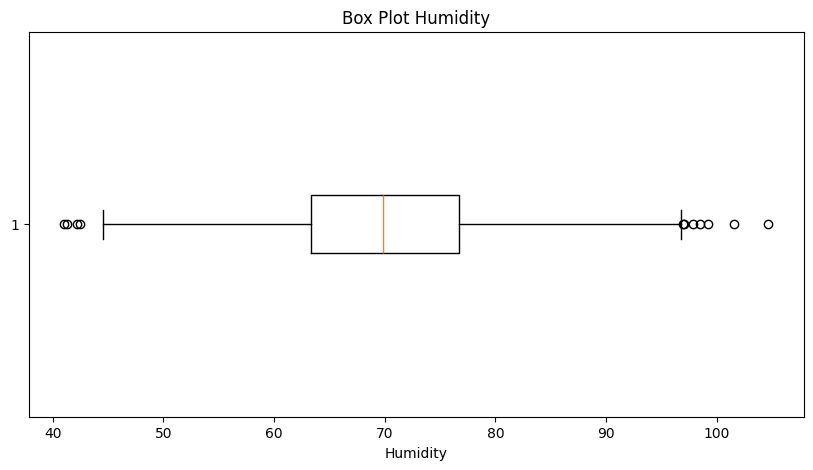

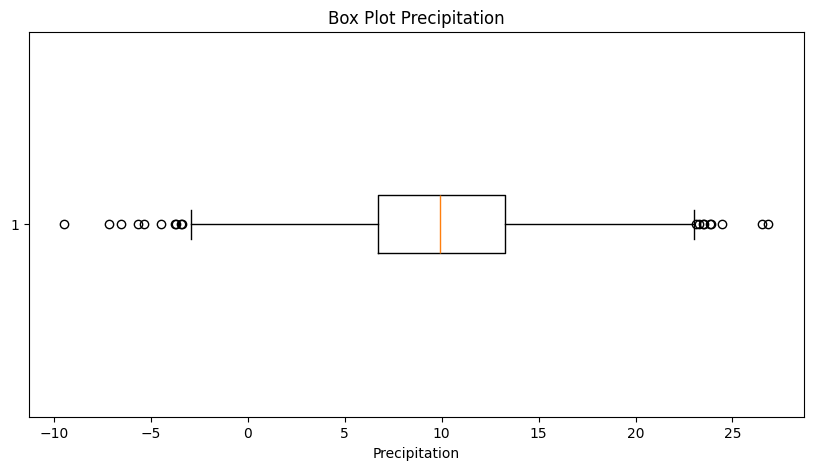

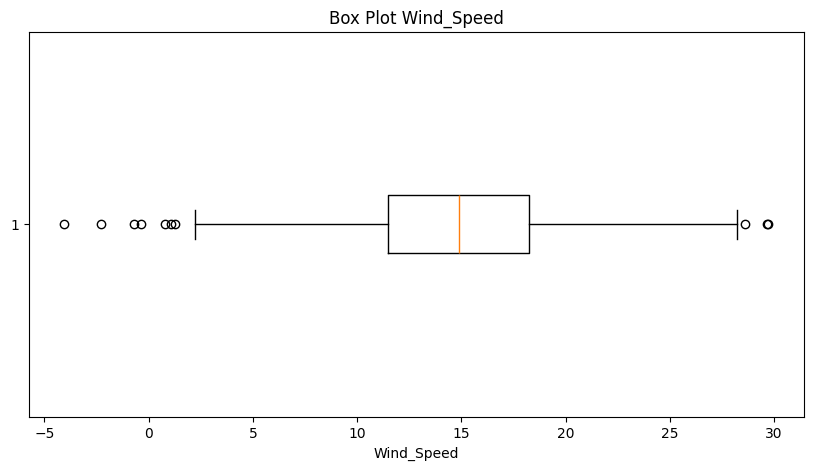

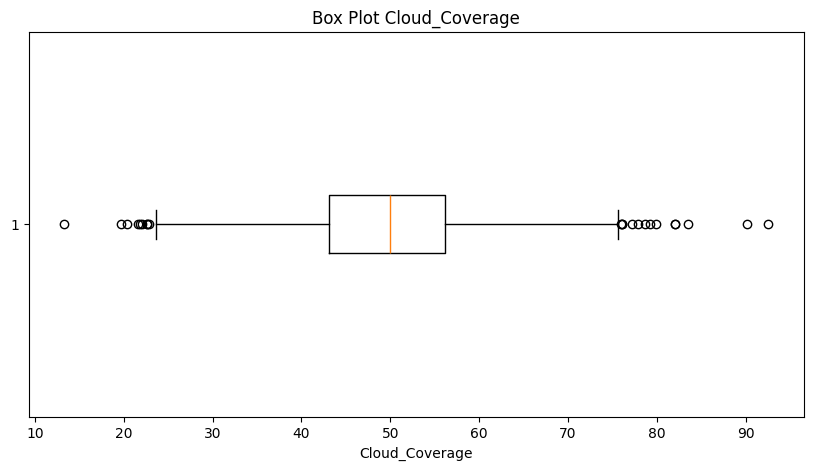

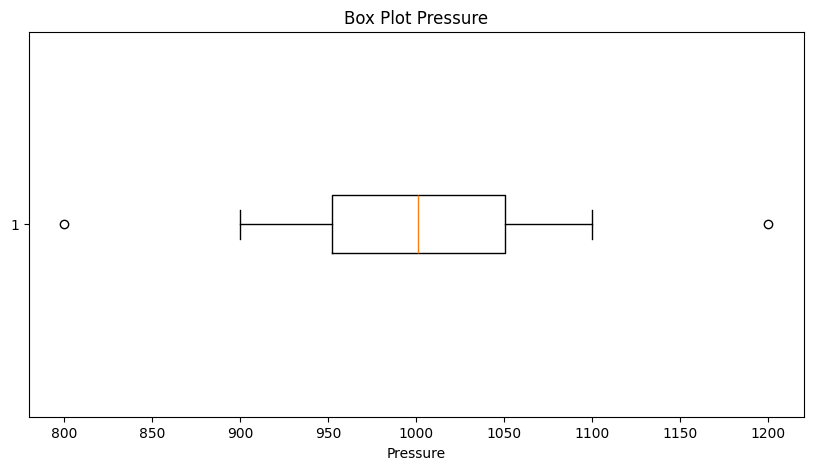

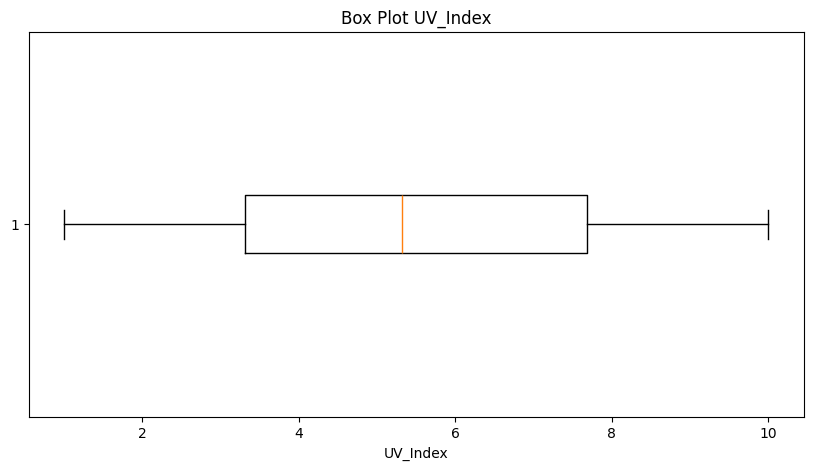

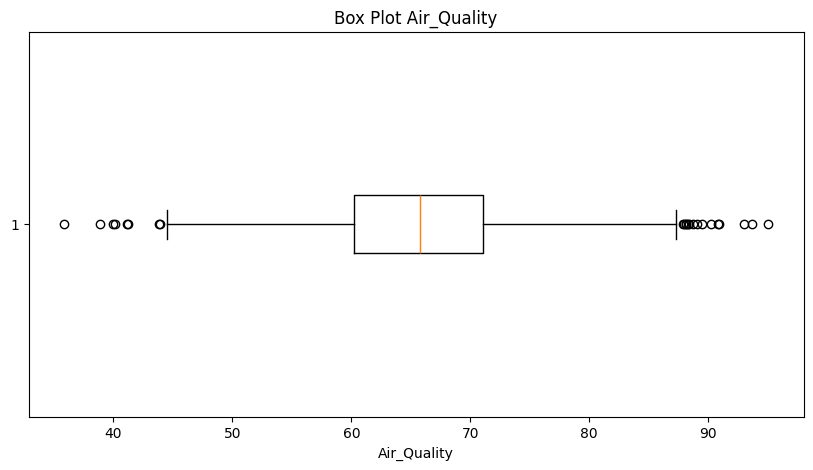

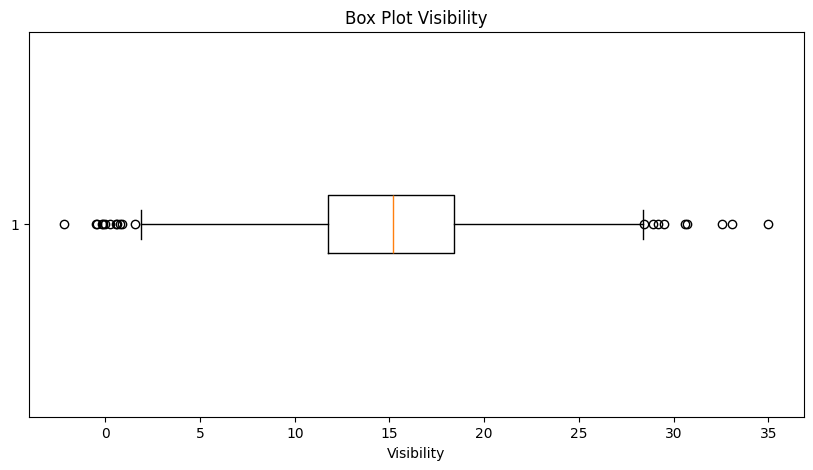

In [22]:
hist_data = hitung_histogram_manual(data, bins=10)
boxplot_data = hitung_boxplot_manual(data)

print("Visualisasi Histogram dan Box Plot Manual:")
visualisasi_histogram_manual(hist_data)
visualisasi_boxplot_manual(boxplot_data)

Visualisasi Histogram untuk Kolom String Manual:


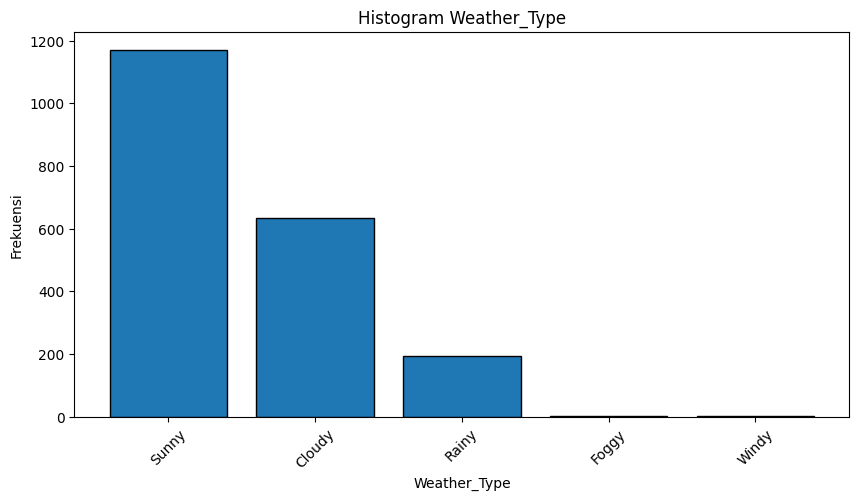

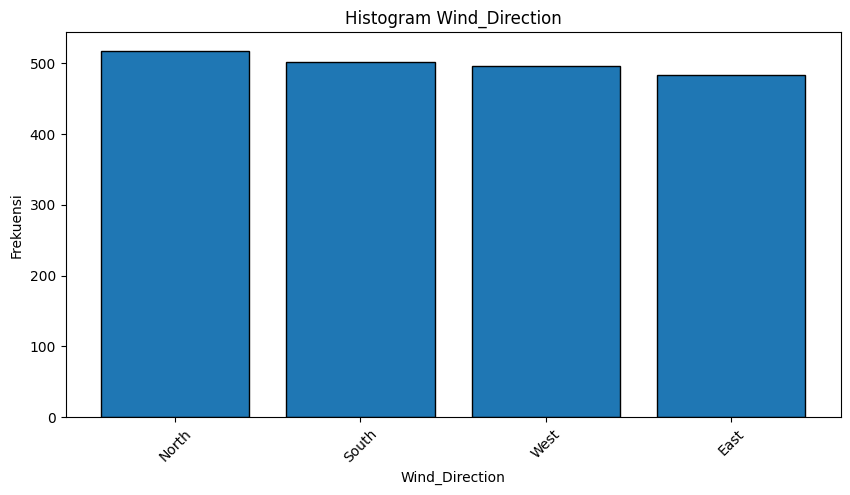

In [23]:
hist_string_data = hitung_histogram_string_manual(data)

print("Visualisasi Histogram untuk Kolom String Manual:")
visualisasi_histogram_string_manual(hist_string_data)

## Penjelasan Numeric

### Penjelasan untuk kolom Temperature:
Histogram dan box plot untuk kolom Temperature menunjukkan distribusi nilai dalam dataset.
Histogram Temperature menunjukkan bahwa nilai-nilai cenderung terdistribusi secara normal dengan beberapa outlier yang terdeteksi pada box plot.
Box plot menunjukkan nilai median Temperature, dengan rentang interkuartil (IQR) yang relatif lebar.
Terdapat 13 outliers yang terdeteksi di luar batas bawah (16.808970344677903) dan batas atas (33.103385558495674).

### Penjelasan untuk kolom Humidity:
Histogram dan box plot untuk kolom Humidity menunjukkan distribusi nilai dalam dataset.
Histogram Humidity menunjukkan bahwa nilai-nilai cenderung terdistribusi secara normal dengan beberapa outlier yang terdeteksi pada box plot.
Box plot menunjukkan nilai median Humidity, dengan rentang interkuartil (IQR) yang relatif lebar.
Terdapat 11 outliers yang terdeteksi di luar batas bawah (43.15522909557873) dan batas atas (96.91677218878385).

### Penjelasan untuk kolom Precipitation:
Histogram dan box plot untuk kolom Precipitation menunjukkan distribusi nilai dalam dataset.
Histogram Precipitation menunjukkan bahwa nilai-nilai cenderung terdistribusi secara normal dengan beberapa outlier yang terdeteksi pada box plot.
Box plot menunjukkan nilai median Precipitation, dengan rentang interkuartil (IQR) yang relatif lebar.
Terdapat 19 outliers yang terdeteksi di luar batas bawah (-3.141103236438104) dan batas atas (23.09232396217779).


### Penjelasan untuk kolom Wind_Speed:
Histogram dan box plot untuk kolom Wind_Speed menunjukkan distribusi nilai dalam dataset.
Histogram Wind_Speed menunjukkan bahwa nilai-nilai cenderung terdistribusi secara normal dengan beberapa outlier yang terdeteksi pada box plot.
Box plot menunjukkan nilai median Wind_Speed, dengan rentang interkuartil (IQR) yang relatif lebar.
Terdapat 10 outliers yang terdeteksi di luar batas bawah (1.375958436980623) dan batas atas (28.38922173962742).

### Penjelasan untuk kolom Cloud_Coverage:
Histogram dan box plot untuk kolom Cloud_Coverage menunjukkan distribusi nilai dalam dataset.
Histogram Cloud_Coverage menunjukkan bahwa nilai-nilai cenderung terdistribusi secara normal dengan beberapa outlier yang terdeteksi pada box plot.
Box plot menunjukkan nilai median Cloud_Coverage, dengan rentang interkuartil (IQR) yang relatif lebar.
Terdapat 22 outliers yang terdeteksi di luar batas bawah (23.510059589899083) dan batas atas (75.82891829234454).

### Penjelasan untuk kolom Pressure:
Histogram dan box plot untuk kolom Pressure menunjukkan distribusi nilai dalam dataset.
Histogram Pressure menunjukkan bahwa nilai-nilai cenderung terdistribusi secara normal dengan beberapa outlier yang terdeteksi pada box plot.
Box plot menunjukkan nilai median Pressure, dengan rentang interkuartil (IQR) yang relatif lebar.
Terdapat 2 outliers yang terdeteksi di luar batas bawah (804.3755413978918) dan batas atas (1198.500747626061).

### Penjelasan untuk kolom UV_Index:
Histogram dan box plot untuk kolom UV_Index menunjukkan distribusi nilai dalam dataset.
Histogram UV_Index menunjukkan bahwa nilai-nilai cenderung terdistribusi secara normal dengan beberapa outlier yang terdeteksi pada box plot.
Box plot menunjukkan nilai median UV_Index, dengan rentang interkuartil (IQR) yang relatif lebar.
Terdapat 0 outliers yang terdeteksi di luar batas bawah (-3.221951662004281) dan batas atas (14.218349233308919).

### Penjelasan untuk kolom Air_Quality:
Histogram dan box plot untuk kolom Air_Quality menunjukkan distribusi nilai dalam dataset.
Histogram Air_Quality menunjukkan bahwa nilai-nilai cenderung terdistribusi secara normal dengan beberapa outlier yang terdeteksi pada box plot.
Box plot menunjukkan nilai median Air_Quality, dengan rentang interkuartil (IQR) yang relatif lebar.
Terdapat 23 outliers yang terdeteksi di luar batas bawah (43.9925974088988) dan batas atas (87.32553230197408).

### Penjelasan untuk kolom Visibility:
Histogram dan box plot untuk kolom Visibility menunjukkan distribusi nilai dalam dataset.
Histogram Visibility menunjukkan bahwa nilai-nilai cenderung terdistribusi secara normal dengan beberapa outlier yang terdeteksi pada box plot.
Box plot menunjukkan nilai median Visibility, dengan rentang interkuartil (IQR) yang relatif lebar.
Terdapat 21 outliers yang terdeteksi di luar batas bawah (1.7844701002720722) dan batas atas (28.427242686528345).

## Penjelasan Data String

### Penjelasan untuk kolom Weather_Type:
Histogram Weather_Type menunjukkan distribusi frekuensi untuk setiap kategori dalam dataset.
Tipe yang paling sering muncul dalam kolom Weather_Type adalah Sunny dengan frekuensi 1170.
Ada 5 kategori unik dalam kolom Weather_Type.

### Penjelasan untuk kolom Wind_Direction:
Histogram Wind_Direction menunjukkan distribusi frekuensi untuk setiap kategori dalam dataset.
Tipe yang paling sering muncul dalam kolom Wind_Direction adalah North dengan frekuensi 518.
Ada 4 kategori unik dalam kolom Wind_Direction.